In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt

Text(0.5, 1.0, 'Correlation Curves (Coincidence Rates) for corr_meas_HWP')

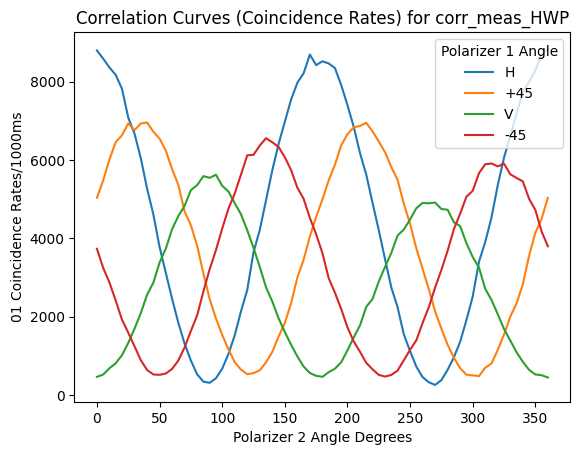

In [2]:
#Graphing our data with HWP 
filemAme = 'corr_meas_HWP'
CoinData = np.loadtxt(filemAme+'.txt', skiprows = 4, dtype=int)
CoinData = np.transpose(CoinData)
plt.plot(CoinData[0],CoinData[1],CoinData[0],CoinData[2],CoinData[0],CoinData[3],CoinData[0],CoinData[4])
plt.legend(['H','+45','V','-45'], title = "Polarizer 1 Angle")
plt.xlabel("Polarizer 2 Angle Degrees")
plt.ylabel("01 Coincidence Rates/1000ms")
plt.title("Correlation Curves (Coincidence Rates) for "+ filemAme)

Text(0.5, 1.0, 'Correlation Curves (Coincidence Rates) for corr_meas_noHWP')

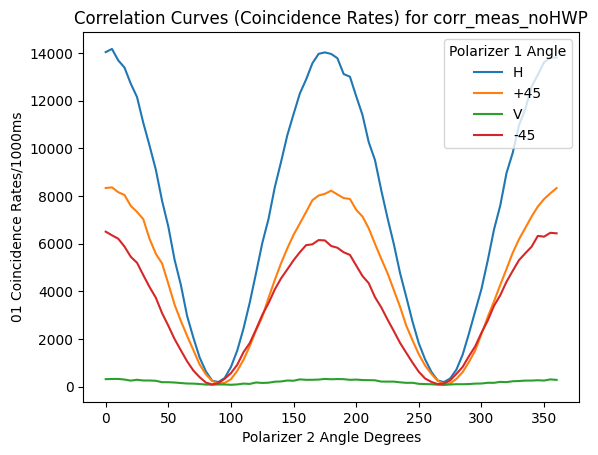

In [3]:
#Graphing our data without HWP
filemAme = 'corr_meas_noHWP'
CoinData = np.loadtxt(filemAme+'.txt', skiprows = 4, dtype=int)
CoinData = np.transpose(CoinData)
plt.plot(CoinData[0],CoinData[1],CoinData[0],CoinData[2],CoinData[0],CoinData[3],CoinData[0],CoinData[4])
plt.legend(['H','+45','V','-45'], title = "Polarizer 1 Angle")
plt.xlabel("Polarizer 2 Angle Degrees")
plt.ylabel("01 Coincidence Rates/1000ms")
plt.title("Correlation Curves (Coincidence Rates) for "+ filemAme)

In [4]:
#This inserts .5 degree averages between two data points since the quED does not measure <1 degree

Angles = []
hA = CoinData[1]
pA = CoinData[2]
vA = CoinData[3]
mA = CoinData[4]

lastC = CoinData[0][0]
for c in CoinData[0]:
    Angles.append((c+lastC)/2)
    Angles.append(c)
    lastC = c
Angles = np.array(Angles[1:])



ValueError: x and y must have same first dimension, but have shapes (145,) and (73,)

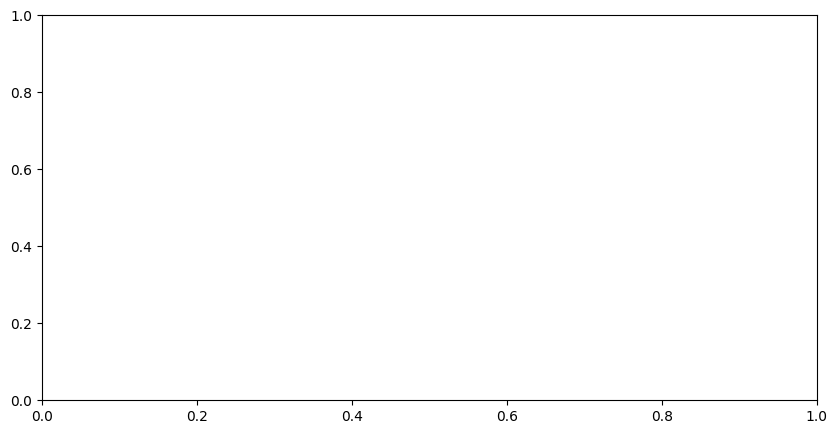

In [5]:
#Find index of Bell angles
Pol2Angles = [22.5,67.5,112.5,157.5] #Bell Angles
I = [] #Index Array
for angle in Pol2Angles:
    I = np.append(I, np.where(Angles==angle)[0]) #Find those angles
I = np.int_(I)

#Example plot of where the Bell Angles are
# Convert I to a numpy array
I = np.array(I, dtype=int)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(Angles,CoinData[0],CoinData[1],CoinData[0],CoinData[2],CoinData[0],CoinData[3],CoinData[0],CoinData[4], label='Sine Wave')  # Example function to plot
plt.scatter(Angles[I], CoinData[0],CoinData[1],CoinData[0],CoinData[2],CoinData[0],CoinData[3],CoinData[0],CoinData[4], color='red', label='Bell Angles')  # Highlight Bell angles
plt.title('Plot Highlighting Bell Angles')
plt.xlabel('Angles (degrees)')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#Scipy fit
Bases = [hA,pA,vA,mA]
rad = np.pi*CoinData[0]/180 #convert to radians

NameError: name 'angles_deg' is not defined

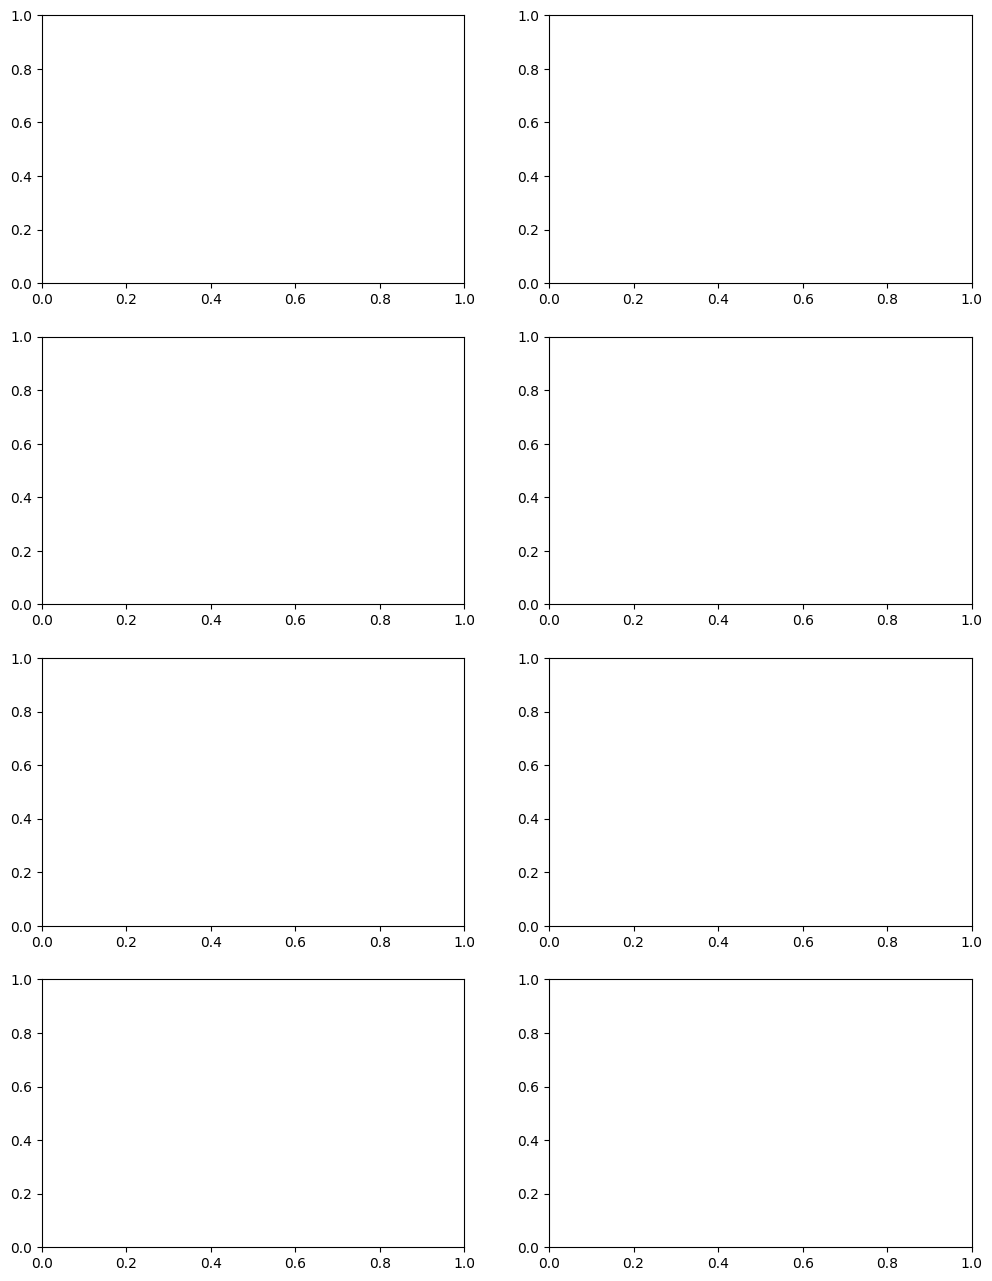

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Theoretical curve: Quantum mechanical coincidences
def QMCoincidences(theta, A, B, phi):
    """
    Theoretical model for quantum mechanical coincidences.
    
    Parameters:
        theta (np.ndarray): Array of angle values (radians).
        A (float): Baseline offset of the cosine squared function.
        B (float): Amplitude of the cosine squared function.
        phi (float): Phase shift in the cosine squared function.
        
    Returns:
        np.ndarray: Evaluated cosine squared function.
    """
    return A + B * np.cos(theta + phi)**2

#Optimize the parameters of the cos2 function to fit our data
paramH, covH = opt.curve_fit(QMCoincidences, rad, Bases[0])
paramP, covP = opt.curve_fit(QMCoincidences, rad, Bases[1])
paramV, covV = opt.curve_fit(QMCoincidences, rad, Bases[2])
paramN, covN = opt.curve_fit(QMCoincidences, rad, Bases[3])

# Optimize the parameters of the cos2 function to fit our data
params = []
fits = []
residuals = []
for base in Bases:
    param, _ = opt.curve_fit(QMCoincidences, rad, base, p0=[1, 1, 0])
    params.append(param)
    fitted_curve = QMCoincidences(rad, *param)
    fits.append(fitted_curve)
    residuals.append(base - fitted_curve)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # Ensure we are creating a 4x2 grid
labels = ['H', '+45', 'V', '-45']
colors = ['blue', 'green', 'red', 'purple']

labels = ['H', '+45', 'V', '-45']
for i in range(4):
    # Plotting data and fits
    axes[i, 0].plot(angles_deg, Bases[i], 'o', label=f'Raw Data {labels[i]}', color=colors[i])
    axes[i, 0].plot(angles_deg, fits[i], label=f'Fit {labels[i]}', color=colors[i], linestyle='--')
    axes[i, 0].set_title(f'Fit and Data for Polarizer {labels[i]}')
    axes[i, 0].set_xlabel('Angle (degrees)')
    axes[i, 0].set_ylabel('Coincidence Rate')
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # Plotting residuals
    axes[i, 1].stem(angles_deg, residuals[i], linefmt=colors[i], basefmt=" ", label=f'Residuals {labels[i]}')
    axes[i, 1].set_title(f'Residuals for Polarizer {labels[i]}')
    axes[i, 1].set_xlabel('Angle (degrees)')
    axes[i, 1].set_ylabel('Residuals')
    axes[i, 1].legend()
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()
# Print out the parameters for review
for i, param in enumerate(params):
    print(f"Parameters for {labels[i]}: A={param[0]:.2f}, B={param[1]:.2f}, phi={param[2]:.2f}")

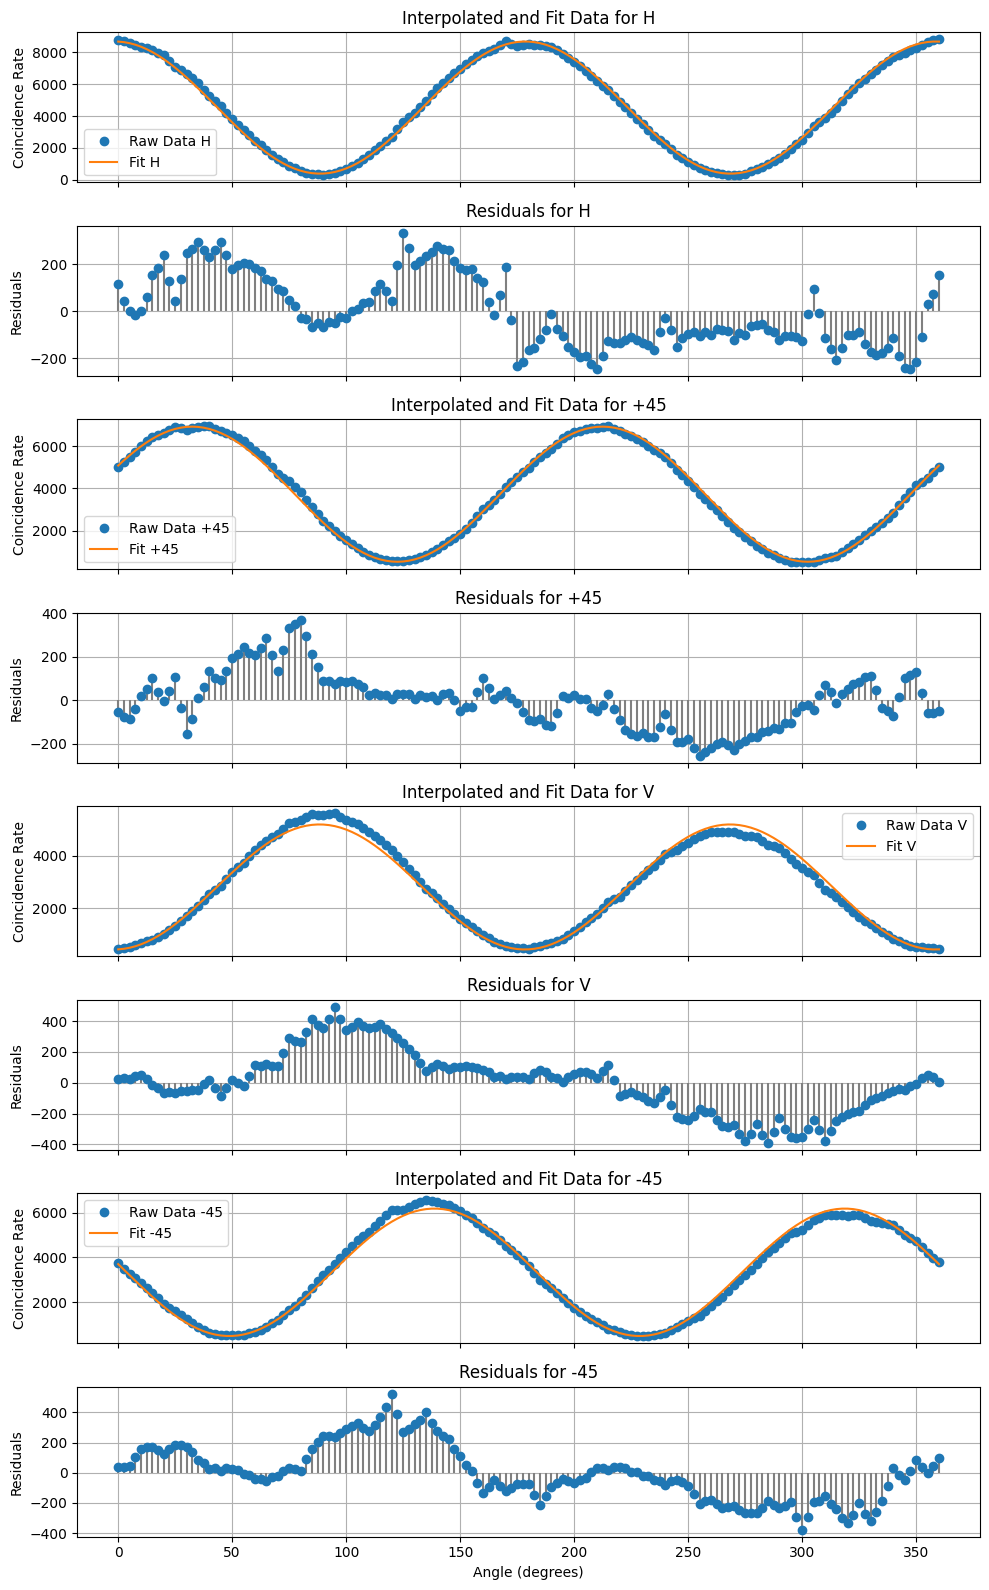

Parameter H: [3.77652756e+02 8.30542713e+03 3.16692889e+00]
Parameter +45: [ 520.39656421 6410.46154086  -63.3983193 ]
Parameter V: [ 4.40661488e+02  4.75049936e+03 -4.68289961e+00]
Parameter -45: [ 492.18100822 5682.63504786   69.83607875]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Define the theoretical curve function for fitting
def QMCoincidences(theta, A, B, phi):
    return A + B * np.cos(theta + phi)**2

# Load data
filename = 'corr_meas_HWP'
CoinData = np.loadtxt(filename + '.txt', skiprows=4, dtype=int)
CoinData = np.transpose(CoinData)

# Original angles and data
original_angles = CoinData[0]
original_rad = np.pi * original_angles / 180  # Convert to radians

# Interpolate angles
interpolated_angles = [original_angles[0]]
for i in range(1, len(original_angles)):
    midpoint = (original_angles[i] + original_angles[i-1]) / 2
    interpolated_angles.append(midpoint)
    interpolated_angles.append(original_angles[i])

interpolated_angles = np.array(interpolated_angles)
interpolated_rad = np.pi * interpolated_angles / 180  # Convert to radians

# Interpolate data for each polarization setting
interpolated_bases = []
for base in CoinData[1:]:
    interpolated_base = [base[0]]
    for i in range(1, len(base)):
        midpoint = (base[i] + base[i-1]) / 2
        interpolated_base.append(midpoint)
        interpolated_base.append(base[i])
    interpolated_bases.append(np.array(interpolated_base))

# Ensure equal lengths
assert len(interpolated_rad) == len(interpolated_bases[0]), "Mismatch in lengths of data and angles"

# Fit the model to the interpolated data and plot
fig, axes = plt.subplots(nrows=2*len(interpolated_bases), figsize=(10, 4*len(interpolated_bases)), sharex=True)
labels = ['H', '+45', 'V', '-45']
params_dict = {}

for i, (base, label) in enumerate(zip(interpolated_bases, labels)):
    param, _ = opt.curve_fit(QMCoincidences, interpolated_rad, base, p0=[1, 1, 0])
    params_dict[label] = param
    model_values = QMCoincidences(interpolated_rad, *param)
    
    # Plot data and fit
    axes[2*i].plot(interpolated_angles, base, 'o', label=f'Raw Data {label}')
    axes[2*i].plot(interpolated_angles, model_values, label=f'Fit {label}')
    axes[2*i].legend()
    axes[2*i].set_title(f'Interpolated and Fit Data for {label}')
    axes[2*i].set_ylabel('Coincidence Rate')
    axes[2*i].grid(True)
    
    # Plot residuals
    residuals = base - model_values
    axes[2*i+1].stem(interpolated_angles, residuals, linefmt='gray', markerfmt='oC0', basefmt=" ")
    axes[2*i+1].set_title(f'Residuals for {label}')
    axes[2*i+1].set_ylabel('Residuals')
    axes[2*i+1].grid(True)

axes[-1].set_xlabel('Angle (degrees)')  # Set x-label only on the last subplot
plt.tight_layout()
plt.show()

# Parameters for each setting
paramH = params_dict['H']
paramP = params_dict['+45']
paramV = params_dict['V']
paramN = params_dict['-45']

print("Parameter H:", paramH)
print("Parameter +45:", paramP)
print("Parameter V:", paramV)
print("Parameter -45:", paramN)


In [11]:
pip install scikit-learn


     ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
     --------------------------------------- 0.0/10.6 MB 960.0 kB/s eta 0:00:11
     ---------------------------------------- 0.1/10.6 MB 1.4 MB/s eta 0:00:08
      --------------------------------------- 0.2/10.6 MB 1.6 MB/s eta 0:00:07
     - -------------------------------------- 0.3/10.6 MB 1.6 MB/s eta 0:00:07
     - -------------------------------------- 0.4/10.6 MB 1.6 MB/s eta 0:00:07
     - -------------------------------------- 0.5/10.6 MB 1.7 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/10.6 MB 1.8 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/10.6 MB 1.8 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/10.6 MB 1.9 MB/s eta 0:00:06
     --- ------------------------------------ 0.8/10.6 MB 1.9 MB/s eta 0:00:06
     --- ------------------------------------ 0.9/10.6 MB 1.8 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/10.6 MB 


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\tommy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:

#Closeness of fit

# 'fits' are model predictions and 'Bases' are actual data
for i, (fit, base) in enumerate(zip(fits, Bases)):
    # Calculate the mean of the observed data
    mean_observed = np.mean(base)
    
    # Calculate R-squared
    ss_res = np.sum((base - fit) ** 2)
    ss_tot = np.sum((base - mean_observed) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((base - fit) ** 2))
    
    print(f"Fit {labels[i]} - R-squared: {r_squared:.2f}, RMSE: {rmse:.2f}")


Fit H - R-squared: 0.99, RMSE: 348.02
Fit +45 - R-squared: 1.00, RMSE: 187.05
Fit V - R-squared: 0.96, RMSE: 14.97
Fit -45 - R-squared: 0.99, RMSE: 168.88


In [47]:
# Define QMCoincidences for specific parameters
def QMCoincidences(theta, A, B, phi):
    return A + B * np.cos(theta + phi)**2


# Evaluating the model at the specific indices for Bell angles
h_values = QMCoincidences(rad[I]/2*np.pi, *paramH)
p_values = QMCoincidences(rad[I]/2*np.pi, *paramP)
v_values = QMCoincidences(rad[I]/2*np.pi, *paramV)
n_values = QMCoincidences(rad[I]/2*np.pi, *paramN)

# Calculate the expectation values
# Pol2Angles = [22.5,67.5,112.5,157.5] #Bell Angles
# beta- alpha = 112.5
E1 = (h_values[2] - p_values[2] + v_values[2] + n_values[2]) / np.sqrt(np.sum([h_values[2]**2, p_values[2]**2, v_values[2]**2, n_values[2]**2]))
# beta - alpha = 157.5
E2 = (h_values[3] - p_values[3] + v_values[3] + n_values[3]) / np.sqrt(np.sum([h_values[3]**2, p_values[3]**2, v_values[3]**2, n_values[3]**2]))
# beta - alpha = 67.5
E3 = (h_values[1] - p_values[1] + v_values[1] + n_values[1]) / np.sqrt(np.sum([h_values[1]**2, p_values[1]**2, v_values[1]**2, n_values[1]**2]))
#beta - alpha = 112.5
E4 = (h_values[0] - p_values[0] + v_values[0] + n_values[0]) / np.sqrt(np.sum([h_values[0]**2, p_values[0]**2, v_values[0]**2, n_values[0]**2]))

# Calculate S
S = E1 - E2 + E3 + E4

print(f"S-parameter: {S}")
print(E1)
print(E2)
print(E3)
print(E4)
print(h_values[2])

S-parameter: -0.07113241884861865
0.8516264948686396
1.545821167780374
0.21931148236731574
0.4037507716957999
8616.95584717243


In [ ]:
#Uncertainty calculations using the formula discussed in the procedure



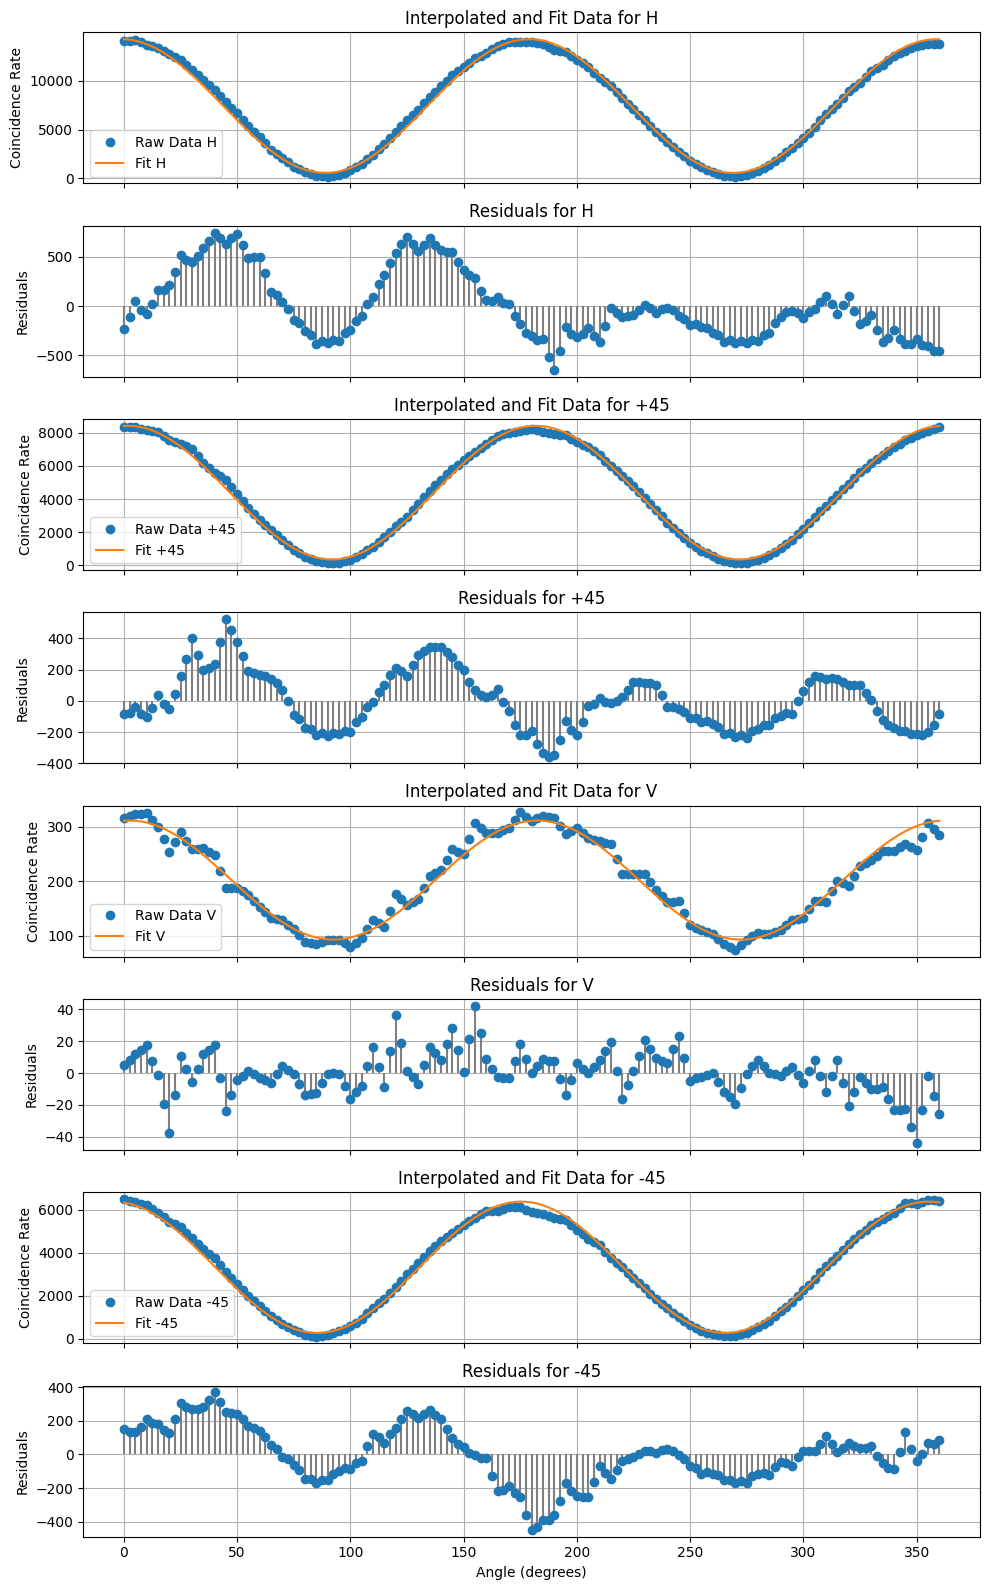

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Define the theoretical curve function for fitting
def QMCoincidences(theta, A, B, phi):
    return A + B * np.cos(theta + phi)**2

# Load data
filename = 'corr_meas_noHWP'
CoinData = np.loadtxt(filename + '.txt', skiprows=4, dtype=int)
CoinData = np.transpose(CoinData)

# Original angles and data
original_angles = CoinData[0]
original_rad = np.pi * original_angles / 180  # Convert to radians

# Interpolate angles
interpolated_angles = [original_angles[0]]
for i in range(1, len(original_angles)):
    midpoint = (original_angles[i] + original_angles[i-1]) / 2
    interpolated_angles.append(midpoint)
    interpolated_angles.append(original_angles[i])

interpolated_angles = np.array(interpolated_angles)
interpolated_rad = np.pi * interpolated_angles / 180  # Convert to radians

# Interpolate data for each polarization setting
interpolated_bases = []
for base in CoinData[1:]:
    interpolated_base = [base[0]]
    for i in range(1, len(base)):
        midpoint = (base[i] + base[i-1]) / 2
        interpolated_base.append(midpoint)
        interpolated_base.append(base[i])
    interpolated_bases.append(np.array(interpolated_base))

# Ensure equal lengths
assert len(interpolated_rad) == len(interpolated_bases[0]), "Mismatch in lengths of data and angles"

# Fit the model to the interpolated data and plot
fig, axes = plt.subplots(nrows=2*len(interpolated_bases), figsize=(10, 4*len(interpolated_bases)), sharex=True)
labels = ['H', '+45', 'V', '-45']
params = []

for i, (base, label) in enumerate(zip(interpolated_bases, labels)):
    param, _ = opt.curve_fit(QMCoincidences, interpolated_rad, base, p0=[1, 1, 0])
    params.append(param)
    model_values = QMCoincidences(interpolated_rad, *param)
    
    # Plot data and fit
    axes[2*i].plot(interpolated_angles, base, 'o', label=f'Raw Data {label}')
    axes[2*i].plot(interpolated_angles, model_values, label=f'Fit {label}')
    axes[2*i].legend()
    axes[2*i].set_title(f'Interpolated and Fit Data for {label}')
    axes[2*i].set_ylabel('Coincidence Rate')
    axes[2*i].grid(True)
    
    # Plot residuals
    residuals = base - model_values
    axes[2*i+1].stem(interpolated_angles, residuals, linefmt='gray', markerfmt='oC0', basefmt=" ")
    axes[2*i+1].set_title(f'Residuals for {label}')
    axes[2*i+1].set_ylabel('Residuals')
    axes[2*i+1].grid(True)

axes[-1].set_xlabel('Angle (degrees)')  # Set x-label only on the last subplot
plt.tight_layout()
plt.show()



In [51]:
#Closeness of fit

# 'fits' are model predictions and 'Bases' are actual data
for i, (fit, base) in enumerate(zip(fits, Bases)):
    # Calculate the mean of the observed data
    mean_observed = np.mean(base)
    
    # Calculate R-squared
    ss_res = np.sum((base - fit) ** 2)
    ss_tot = np.sum((base - mean_observed) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((base - fit) ** 2))
    
    print(f"Fit {labels[i]} - R-squared: {r_squared:.2f}, RMSE: {rmse:.2f}")


Fit H - R-squared: 0.99, RMSE: 348.02
Fit +45 - R-squared: 1.00, RMSE: 187.05
Fit V - R-squared: 0.96, RMSE: 14.97
Fit -45 - R-squared: 0.99, RMSE: 168.88


In [52]:
# Define QMCoincidences for specific parameters
def QMCoincidences(theta, A, B, phi):
    return A + B * np.cos(theta + phi)**2


# Evaluating the model at the specific indices for Bell angles
h_values = QMCoincidences(rad[I]/2*np.pi, *paramH)
p_values = QMCoincidences(rad[I]/2*np.pi, *paramP)
v_values = QMCoincidences(rad[I]/2*np.pi, *paramV)
n_values = QMCoincidences(rad[I]/2*np.pi, *paramN)

# Calculate the expectation values
# Pol2Angles = [22.5,67.5,112.5,157.5] #Bell Angles
# beta- alpha = 112.5
E1 = (h_values[2] - p_values[2] + v_values[2] + n_values[2]) / np.sqrt(np.sum([h_values[2]**2, p_values[2]**2, v_values[2]**2, n_values[2]**2]))
# beta - alpha = 157.5
E2 = (h_values[3] - p_values[3] + v_values[3] + n_values[3]) / np.sqrt(np.sum([h_values[3]**2, p_values[3]**2, v_values[3]**2, n_values[3]**2]))
# beta - alpha = 67.5
E3 = (h_values[1] - p_values[1] + v_values[1] + n_values[1]) / np.sqrt(np.sum([h_values[1]**2, p_values[1]**2, v_values[1]**2, n_values[1]**2]))
#beta - alpha = 112.5
E4 = (h_values[0] - p_values[0] + v_values[0] + n_values[0]) / np.sqrt(np.sum([h_values[0]**2, p_values[0]**2, v_values[0]**2, n_values[0]**2]))

# Calculate S
S = E1 - E2 + E3 + E4

print(f"S-parameter: {S}")
print(E1)
print(E2)
print(E3)
print(E4)
print(h_values[2])

S-parameter: -0.07113241884861865
0.8516264948686396
1.545821167780374
0.21931148236731574
0.4037507716957999
8616.95584717243
